In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Task 1: Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv("mushroom.csv")

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
# Droping unnaccessary column
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

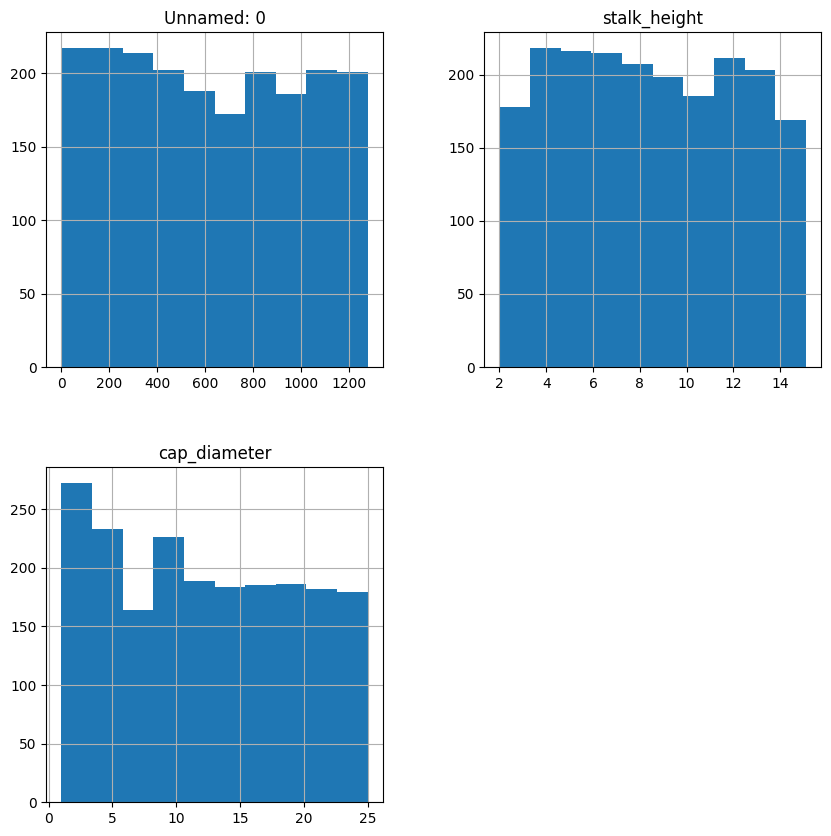

In [7]:
data.hist(figsize=(10, 10))
plt.show()

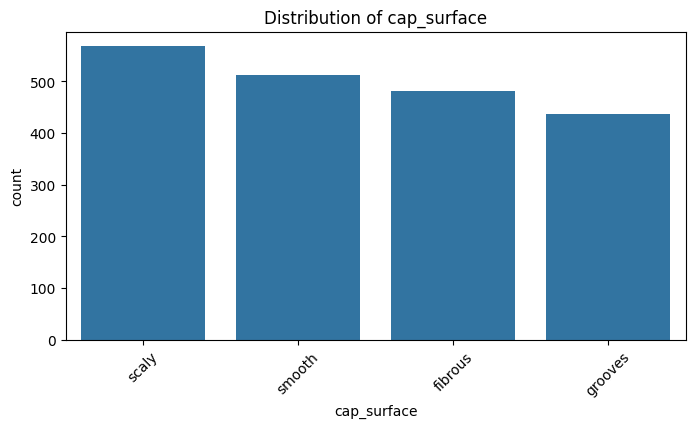

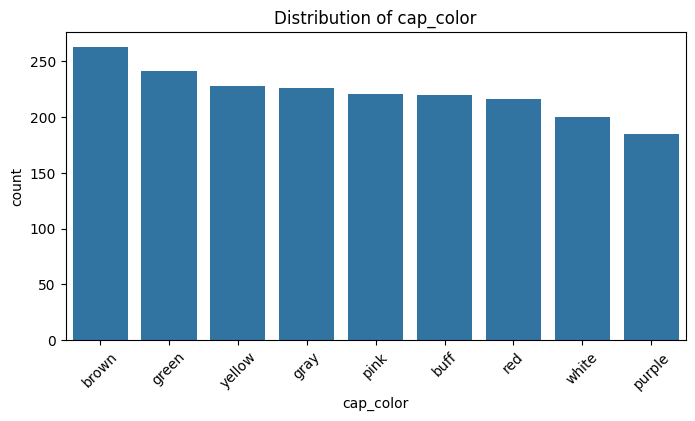

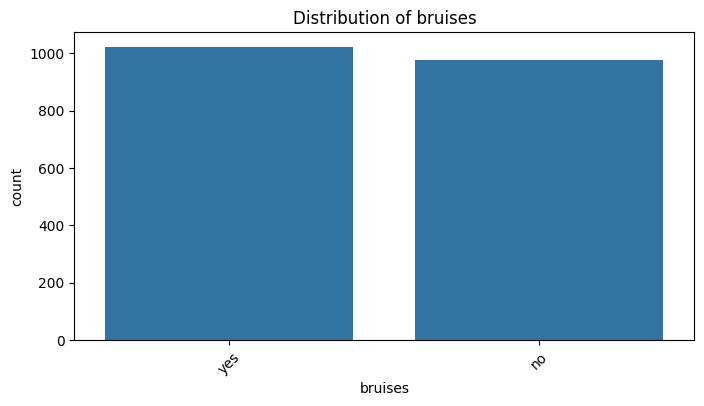

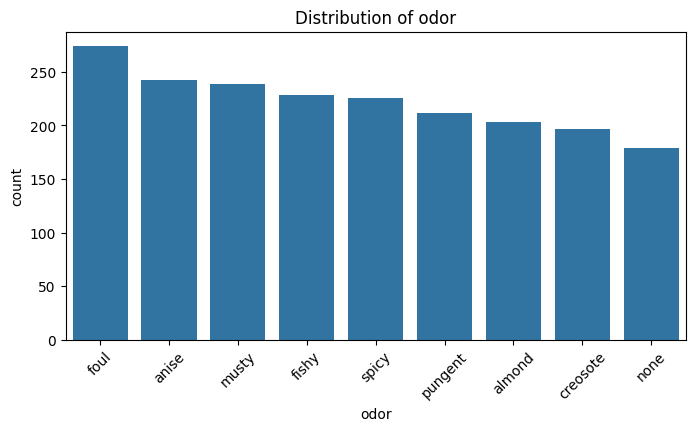

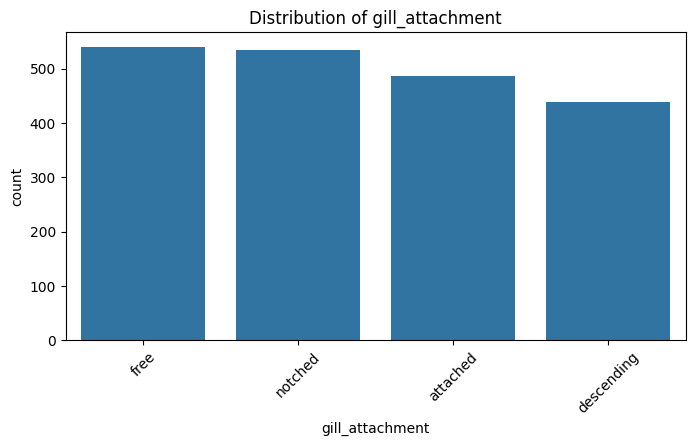

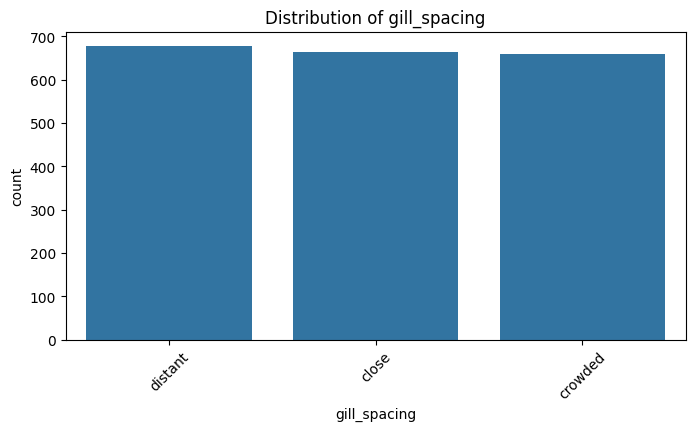

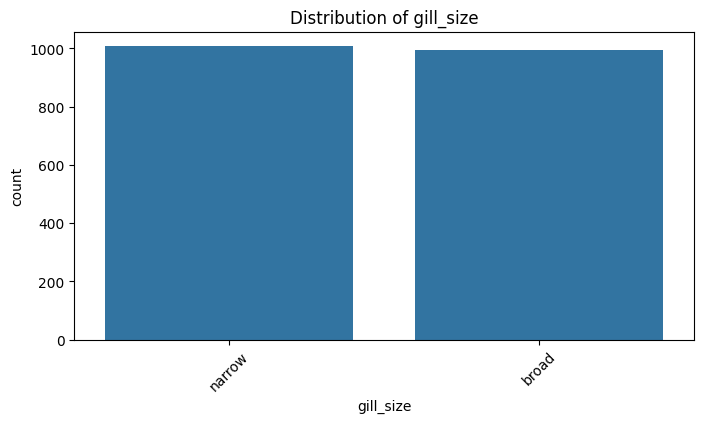

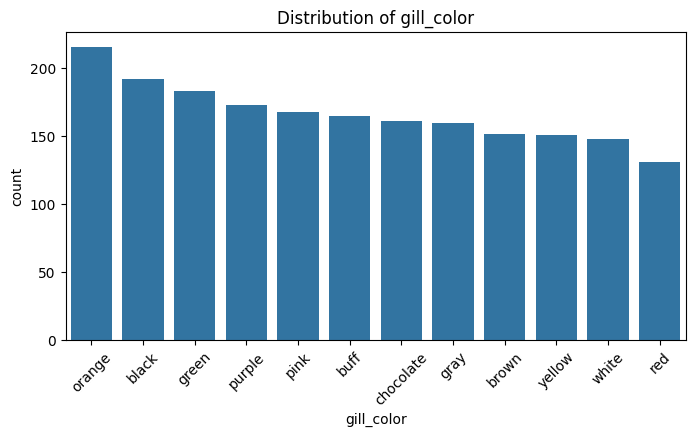

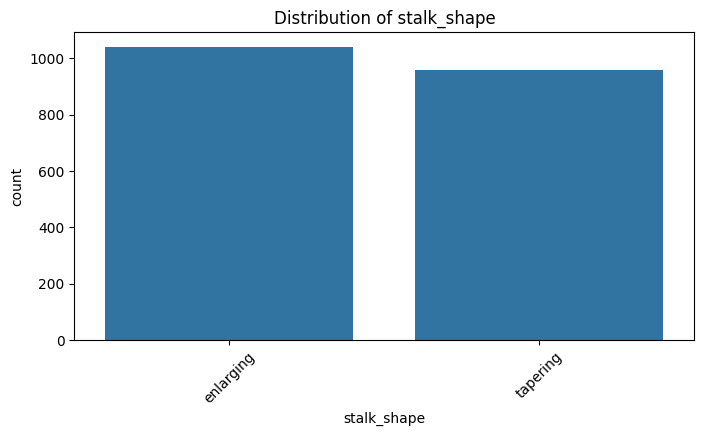

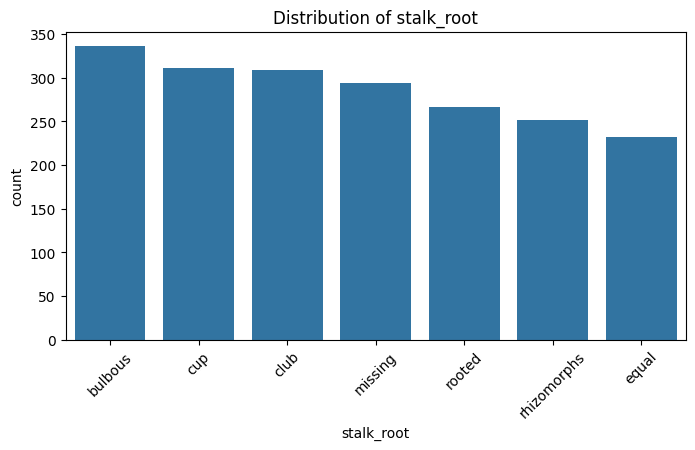

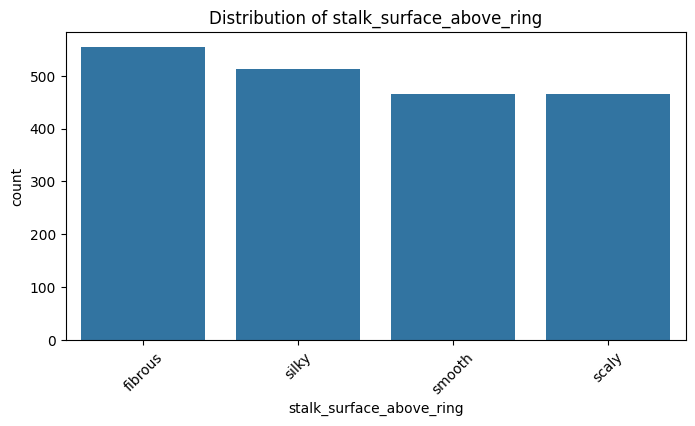

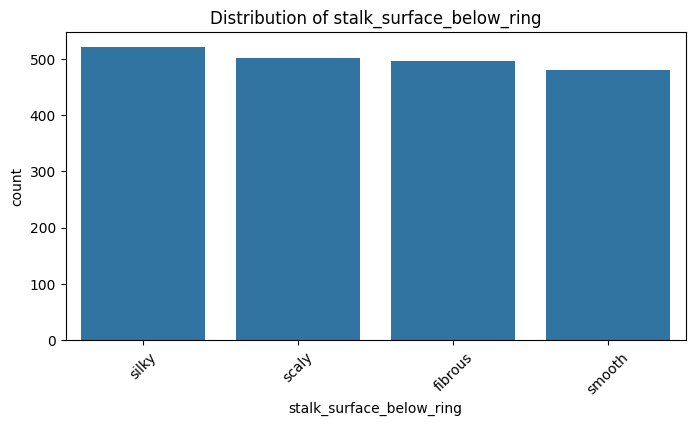

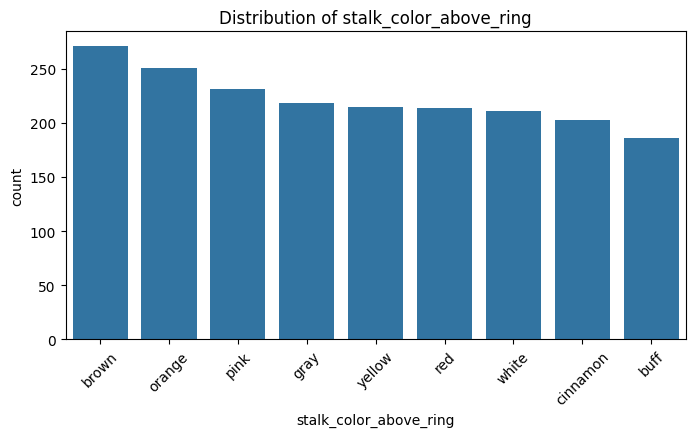

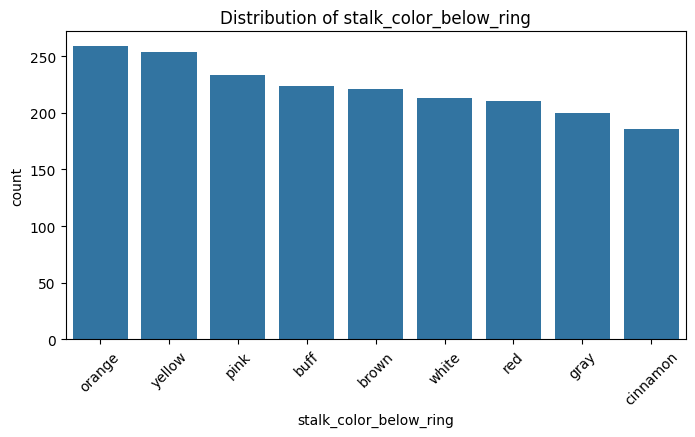

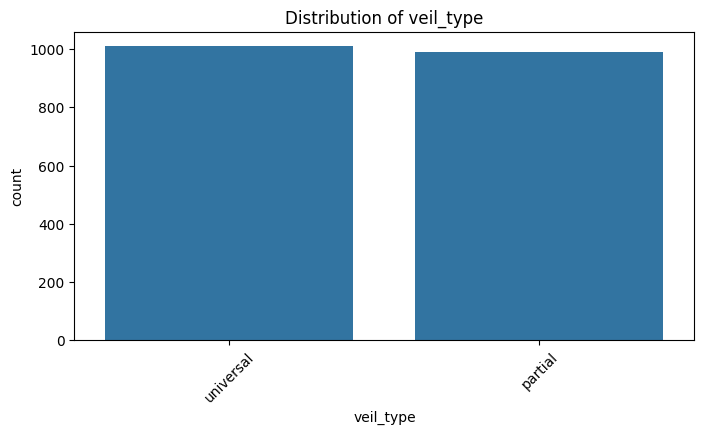

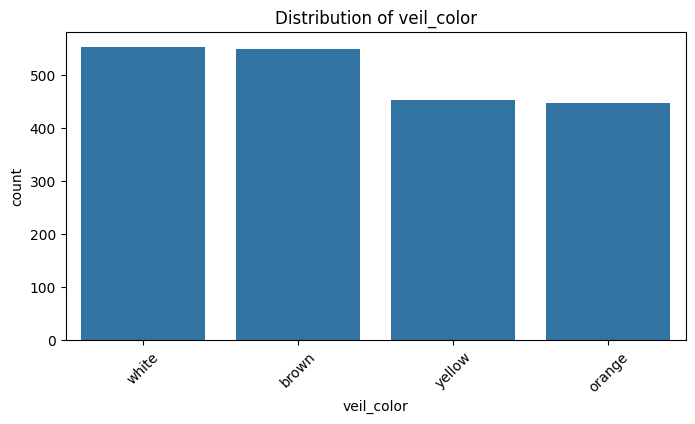

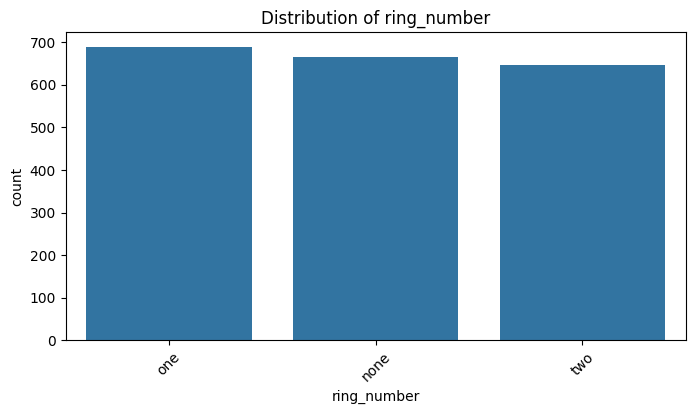

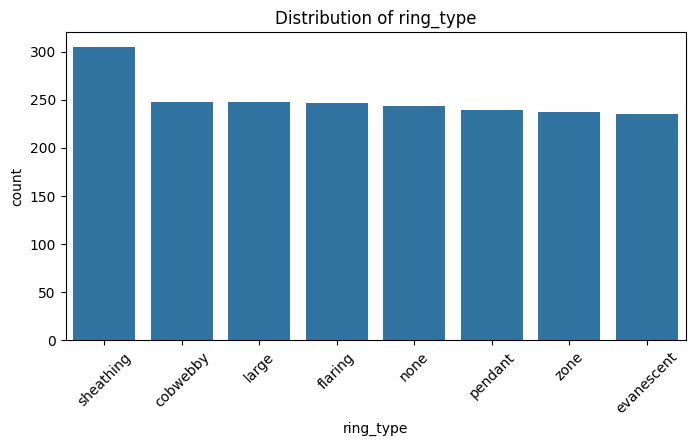

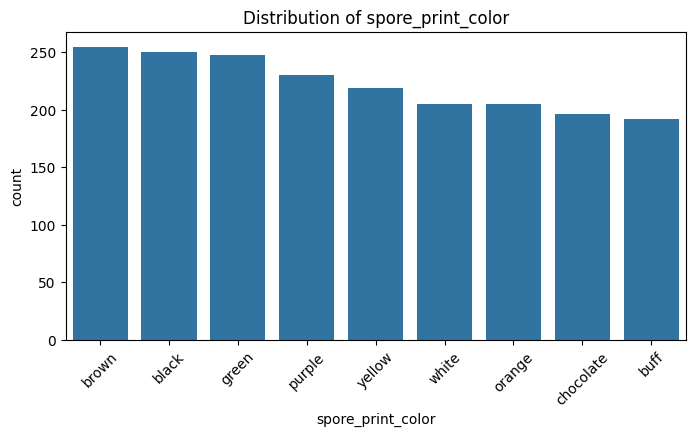

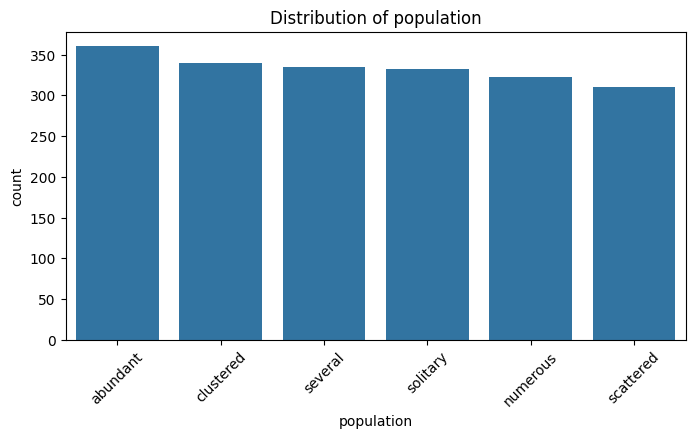

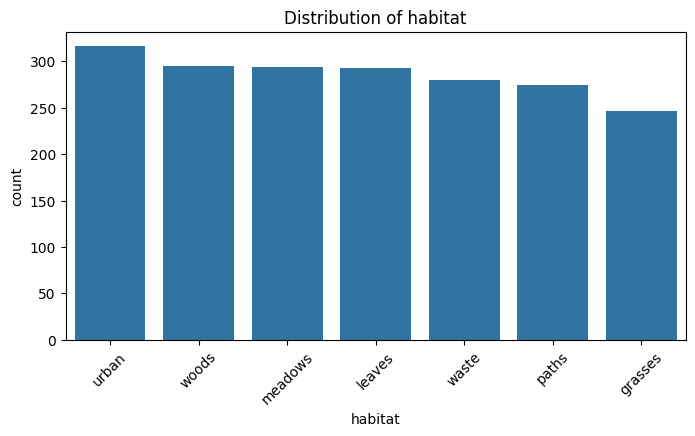

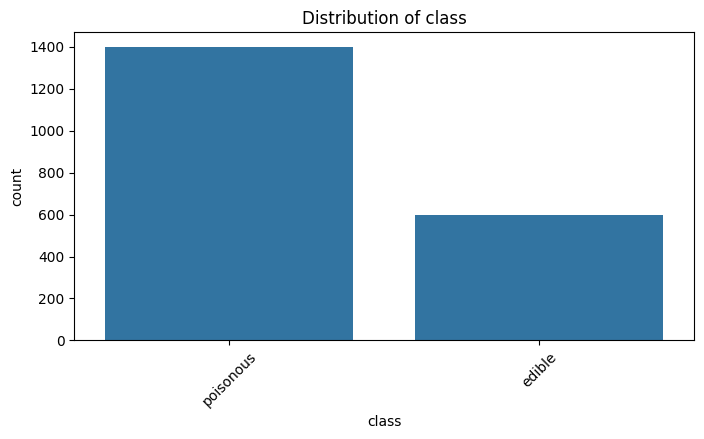

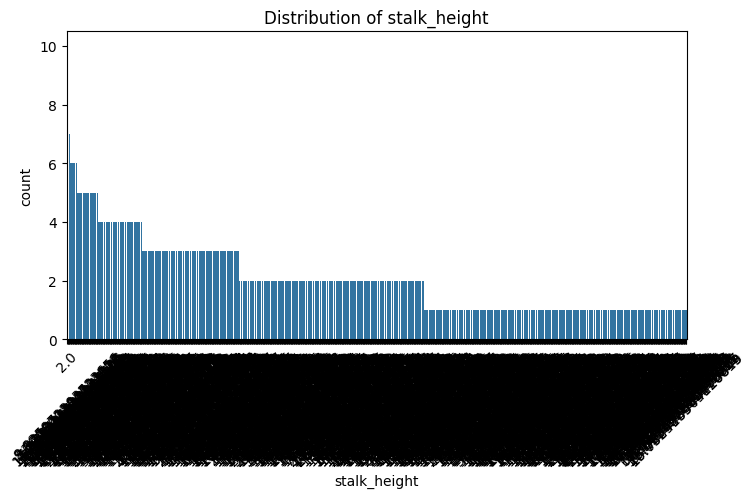

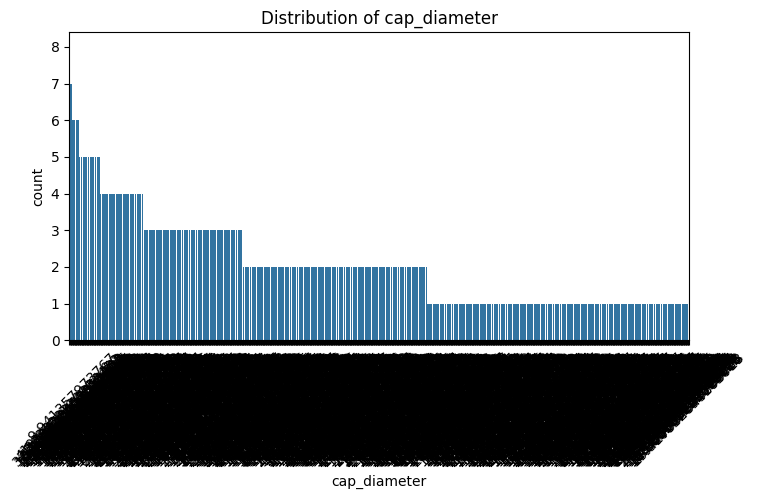

In [11]:
#Visualize feature distributions
for col in data.columns[1:]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

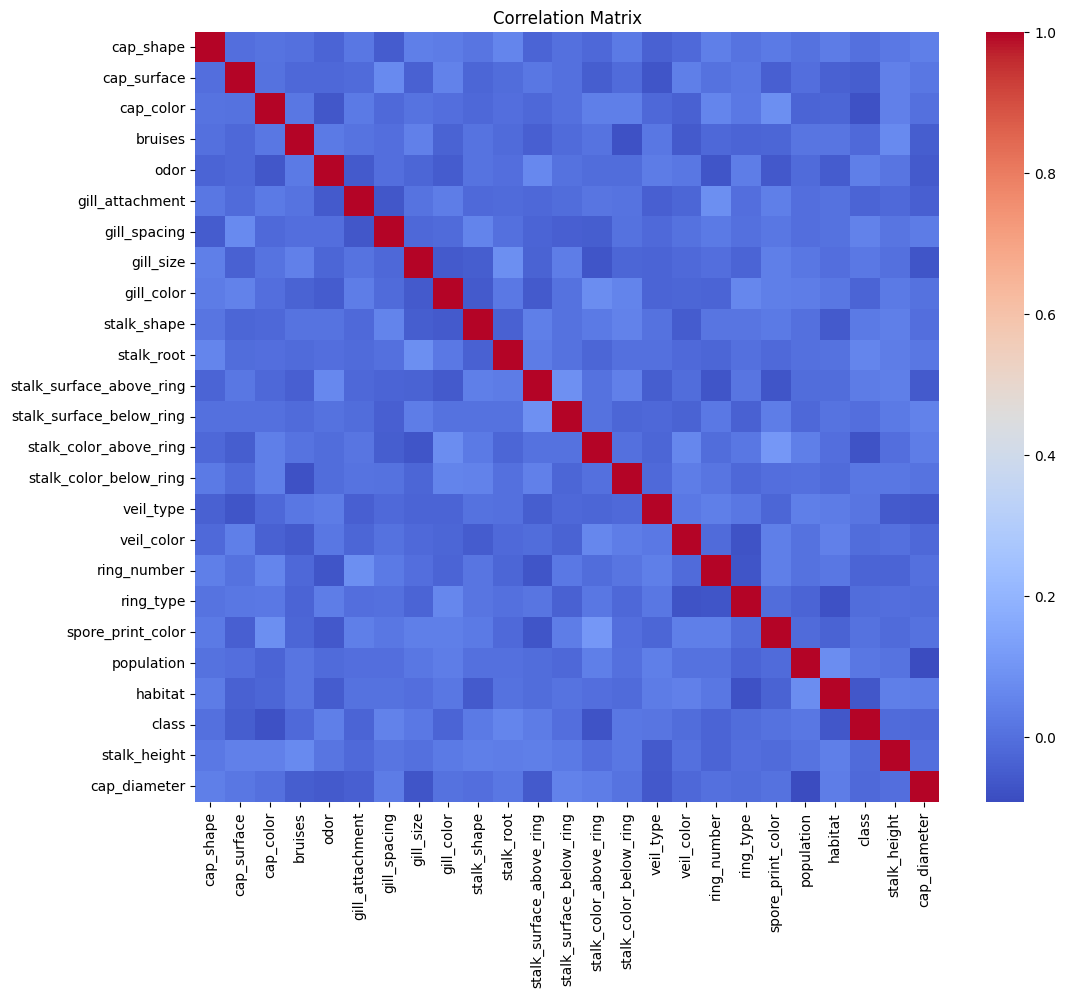

In [15]:
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Task 2: Data Preprocessing

In [16]:
# Separate features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

In [18]:
encode = pd.get_dummies(X)
encode 

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1996,6.500840,13.501957,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1997,13.558064,11.270020,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1998,11.092703,8.423199,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
# Split the data into training and testing(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(encode_x, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 126), (1600,), (400, 126), (400,))

# Task 3: Data Visualization

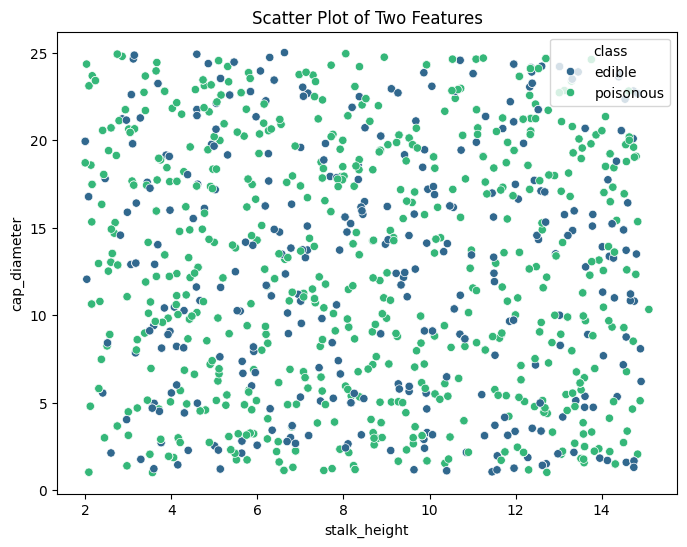

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette="viridis")
plt.title("Scatter Plot of Two Features")
plt.show()

# Task 4: SVM Implementation

In [23]:
scaler = StandardScaler()
scaler

StandardScaler()

In [28]:
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

In [29]:
X_train_scal

array([[ 0.54128268,  0.55915085, -0.4980461 , ..., -0.44149924,
        -0.40242547, -0.42214126],
       [-0.65039375,  0.40146768, -0.4980461 , ..., -0.44149924,
        -0.40242547,  2.36887531],
       [-0.48629564, -1.04220375, -0.4980461 , ..., -0.44149924,
         2.48493217, -0.42214126],
       ...,
       [-1.32464007, -0.37182368, -0.4980461 , ..., -0.44149924,
         2.48493217, -0.42214126],
       [-0.63524551,  1.37998899, -0.4980461 , ..., -0.44149924,
         2.48493217, -0.42214126],
       [-0.57176084,  1.57287872, -0.4980461 , ..., -0.44149924,
        -0.40242547,  2.36887531]])

In [30]:
X_test_scal

array([[-0.84560364, -0.38548599, -0.49609064, ..., -0.3992747 ,
        -0.40765274, -0.39081678],
       [ 1.38353657, -1.25758244, -0.49609064, ..., -0.3992747 ,
        -0.40765274, -0.39081678],
       [ 1.41186991, -0.52227129, -0.49609064, ..., -0.3992747 ,
        -0.40765274,  2.5587438 ],
       ...,
       [-1.13502978, -1.0835365 , -0.49609064, ...,  2.50454133,
        -0.40765274, -0.39081678],
       [-1.41041593,  1.34931812, -0.49609064, ..., -0.3992747 ,
        -0.40765274, -0.39081678],
       [ 0.89212319,  1.28017002, -0.49609064, ..., -0.3992747 ,
        -0.40765274, -0.39081678]])

In [36]:
svm = SVC(kernel='rbf', random_state=42)

In [37]:
svm.fit(X_train_scal, y_train)

SVC(random_state=42)

In [38]:
y_pred = svm.predict(X_test_scal)

In [39]:
y_pred = svm.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[  1 132]
 [  0 267]]

Classification Report:
              precision    recall  f1-score   support

      edible       1.00      0.01      0.01       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.83      0.50      0.41       400
weighted avg       0.78      0.67      0.54       400


Accuracy Score: 0.67


# Task 5: Visualization of SVM Results

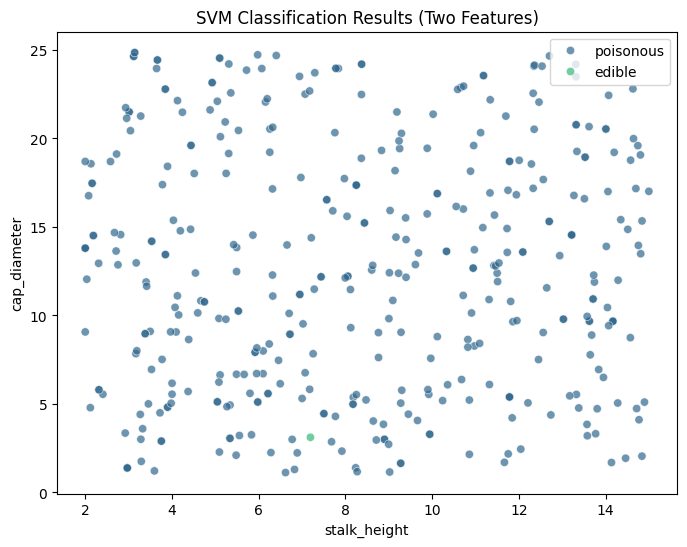

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette="viridis", alpha=0.7)
plt.title("SVM Classification Results (Two Features)")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [45]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("----------------------------")

Kernel: linear
Accuracy: 0.6675
----------------------------
Kernel: poly
Accuracy: 0.6675
----------------------------
Kernel: rbf
Accuracy: 0.6675
----------------------------
Kernel: sigmoid
Accuracy: 0.59
----------------------------


# Task 7: Comparison and Analysis

In [47]:
parameters = {'kernel':['rbf','linear','poly'],
               'gamma':[1,0.1, 0.01, 0.001],
               'C':[0.1, 1, 10]
              }

In [48]:
clf = GridSearchCV(SVC(), param_grid = parameters, verbose = 3, cv=2)

In [49]:
clf.fit(X_train_scal, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.657 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.816 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.810 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.704 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.657 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.816 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [50]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [51]:
y_pred1 = clf.predict(X_test_scal)

In [52]:
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

              precision    recall  f1-score   support

      edible       0.65      0.99      0.79        88
   poisonous       1.00      0.85      0.92       312

    accuracy                           0.88       400
   macro avg       0.83      0.92      0.85       400
weighted avg       0.92      0.88      0.89       400

[[ 87   1]
 [ 46 266]]


In [53]:
# 2.	Analyze SVM strengths and weaknesses 
#Strengths: Handles high-dimensional datasets effectively (e.g., Mushroom dataset). Robust against overfitting in high-dimensional spaces with proper regularization.
#Weaknesses: Nonlinear kernels like RBF or polynomial can be computationally expensive and prone to overfitting with small datasets or improper parameter tuning.

In [ ]:
# 3.Discuss practical implications of SVM in real-world classification tasks.
#SVM is suitable for classification tasks with complex, nonlinear decision boundaries.
#Works well for high-dimensional data and can handle sparse datasets.
#Kernel trick enables SVM to model complex relationships without explicit feature engineering.